In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [3]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [4]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [5]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [6]:
pool2d = nn.MaxPool2d(kernel_size=3)
pool2d(X)

tensor([[[[10.]]]])

In [7]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [8]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [9]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

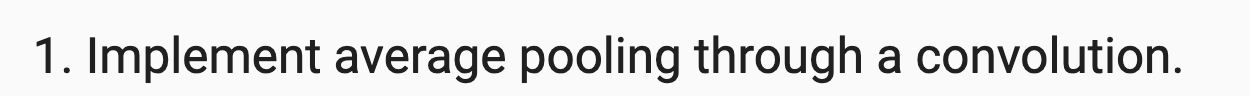

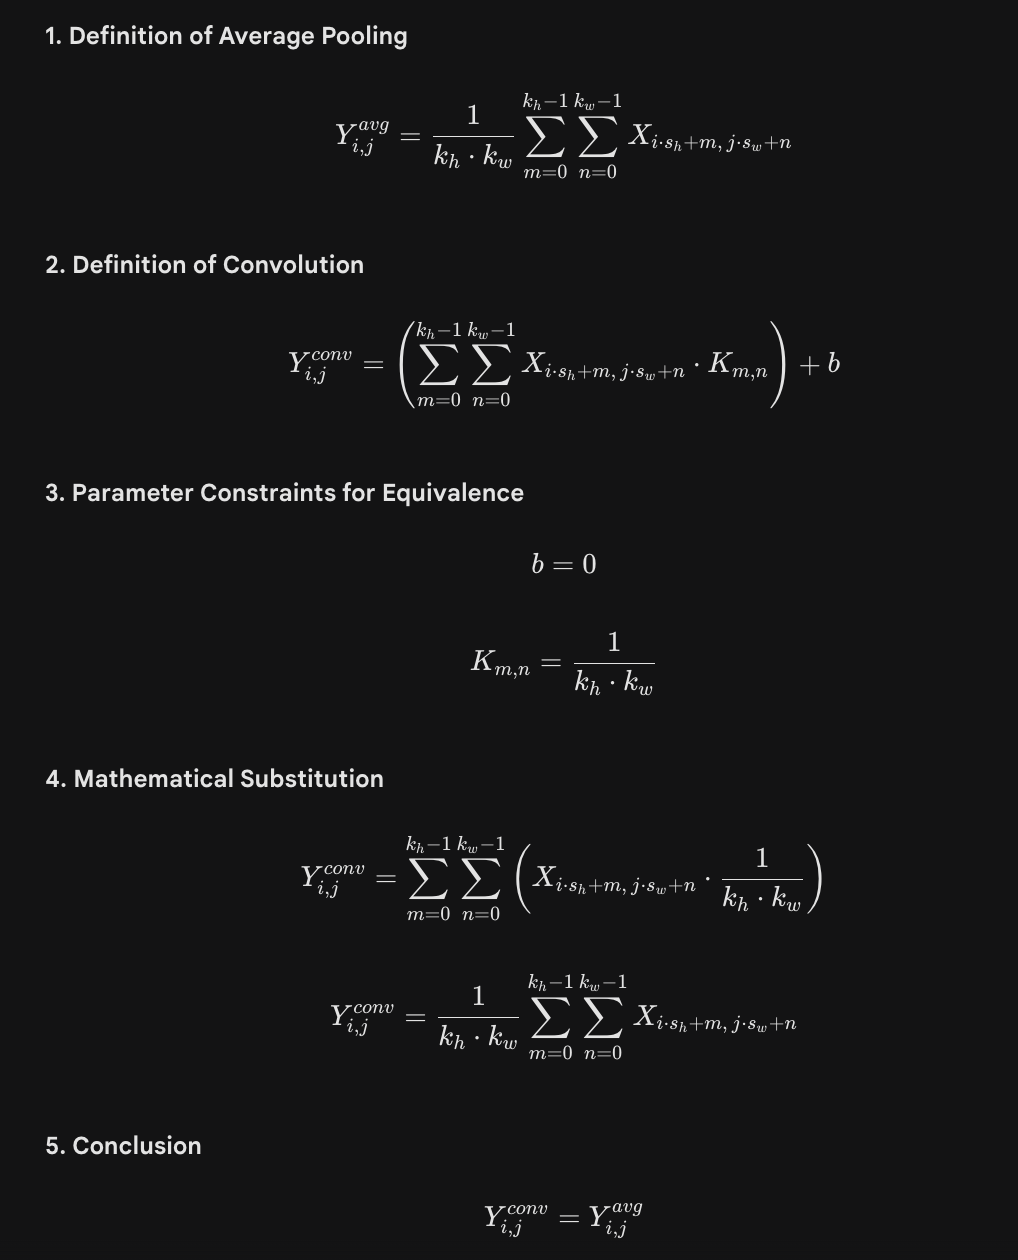

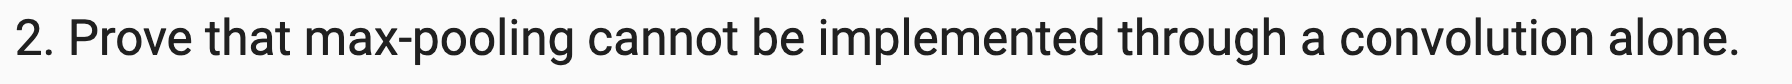

A convolution is a linear transformation, whereas max-pooling is a non-linear function. Because a linear system cannot replicate a non-linear selection process, max-pooling cannot be implemented through a convolution alone.

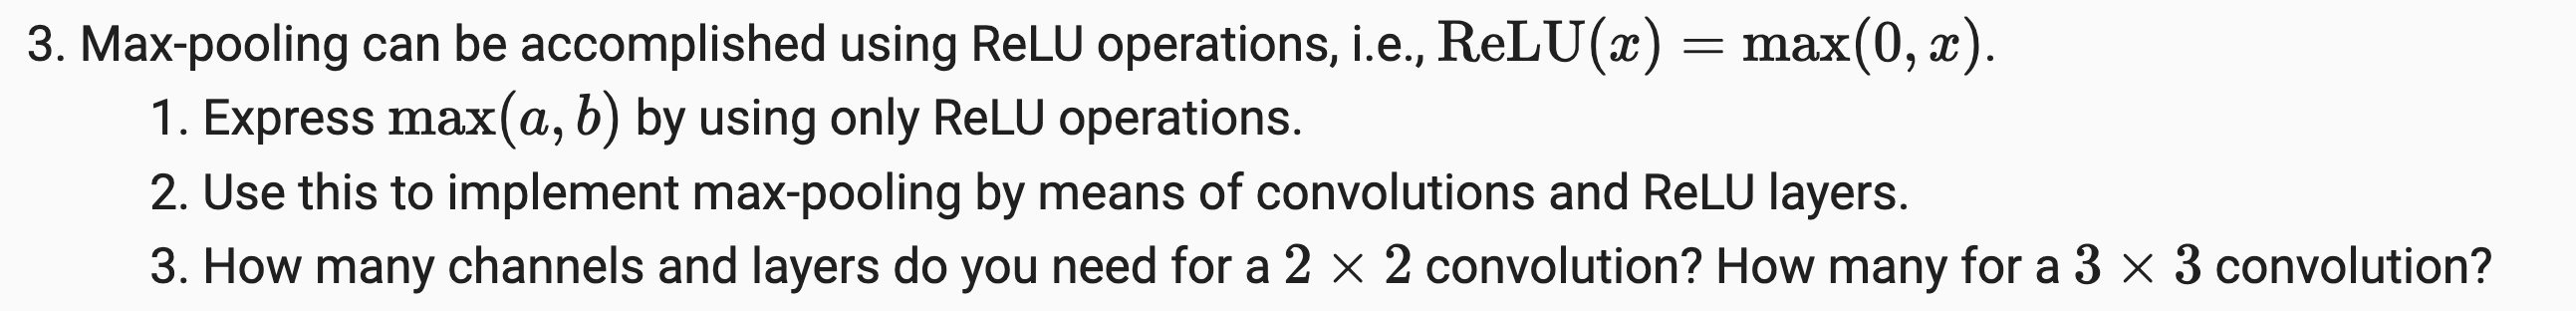

$$\max(a, b) = a + \text{ReLU}(b - a)$$

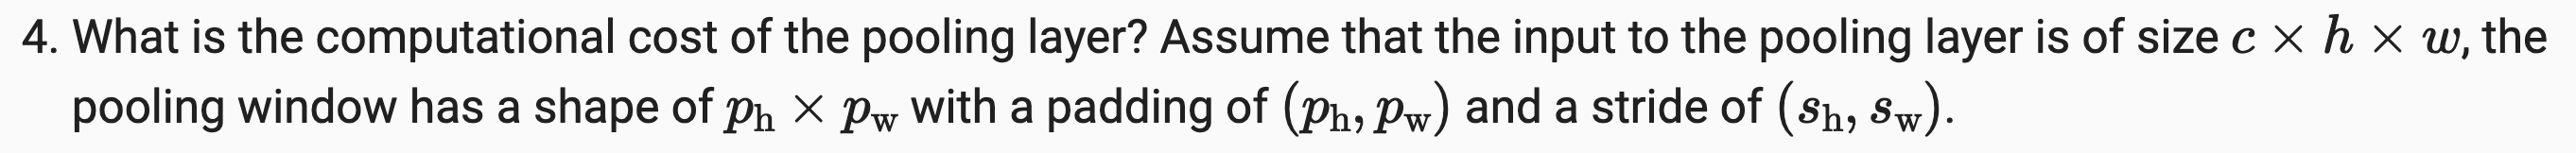

Based on the input $c \times h \times w$ and pooling window $p_h \times p_w$
Logic: Pooling is applied independently to each channel. Unlike convolution, there is no summation across input channels.
Operations per Window:
Max-Pooling: Requires $(p_h \cdot p_w - 1)$ comparisons per window.
Average Pooling: Requires $(p_h \cdot p_w - 1)$ additions and $1$ division per window.
Total Cost:$$\text{Total Cost} \approx c \cdot h_{out} \cdot w_{out} \cdot (p_h \cdot p_w)$$

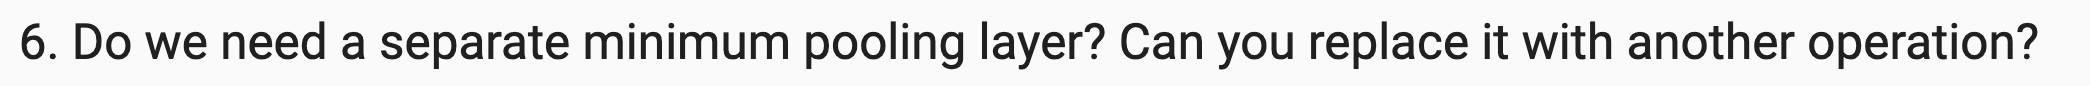

Incompatibility with ReLU: Most networks use the ReLU activation function, which sets all negative values to zero. Max pooling identifies the most "active" or strongest features. Min pooling would highlight the "least active" parts, which are often the parts ReLU has already discarded.

Feature Focus: Convolutional kernels are typically trained to detect the presence of a pattern (like an edge or texture), which results in high activation values. Max pooling preserves these high-signal points, whereas min pooling would preserve the background or the absence of the feature.

Model Symmetry: A neural network can learn to detect "dark" features just as easily as "bright" ones by simply flipping the weights in the convolutional layer. This makes a specialized minimum selector unnecessary for most tasks.

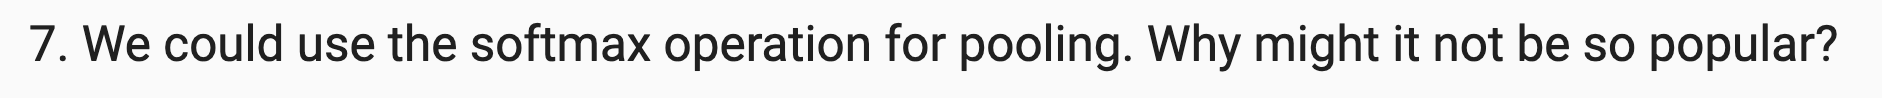

Using softmax for pooling is a bad idea because it squashes all feature intensities into a strict $[0, 1]$ range, which destroys the dynamic range and confidence signals needed by subsequent layers. It is also computationally expensive because calculating exponentials for every window is significantly slower than the simple comparisons used in max-pooling. Finally, because softmax acts as a "winner-take-all" probability distribution, it discards the actual magnitude of the strongest signal, effectively turning powerful feature detections into mere probabilities.